les données : https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction

In [160]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor  # Utilisez KerasRegressor pour les problèmes de régression
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
import random
from keras import regularizers

In [3]:
df = pd.read_csv("/Users/madina/Desktop/ML /Cellphone.csv", sep =",")

In [9]:
# Afficher toutes les colonnes
pd.set_option('display.max_columns', None)
df.head(10)

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


In [198]:
df.describe()

,Price,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,768.187171,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,614.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2744.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,4361.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [7]:
df.drop(columns=['Product_id'], inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   Sale          161 non-null    int64  
 2   weight        161 non-null    float64
 3   resoloution   161 non-null    float64
 4   ppi           161 non-null    int64  
 5   cpu core      161 non-null    int64  
 6   cpu freq      161 non-null    float64
 7   internal mem  161 non-null    float64
 8   ram           161 non-null    float64
 9   RearCam       161 non-null    float64
 10  Front_Cam     161 non-null    float64
 11  battery       161 non-null    int64  
 12  thickness     161 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 16.5 KB


In [13]:
df.isna().sum()

Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

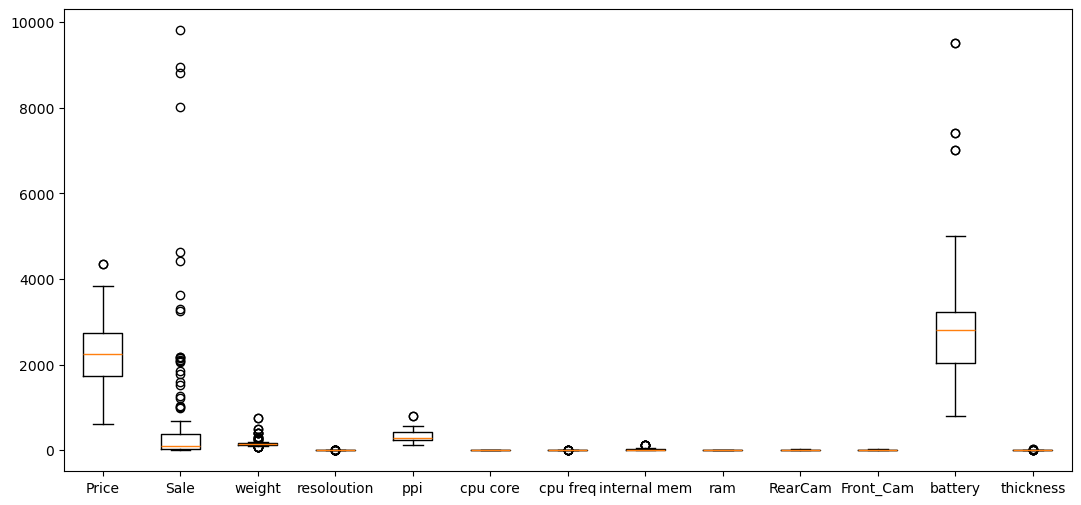

In [15]:
#Figure 1:Boxplot
plt.figure(figsize=(13, 6))
plt.boxplot(df,labels=df.columns)
plt.show()

In [27]:
# Calculer le Z-score pour chaque valeur de 'Sale'
z_scores = stats.zscore(df['Sale'])
outliers_z = df[(z_scores > 3) | (z_scores < -3)]
print(f"Nombre d'outliers (Z-score) pour la variable 'Sale': {len(outliers_z)}")
print(outliers_z[['Sale']])

Nombre d'outliers (Z-score) pour la variable 'Sale': 4
     Sale
157  8016
158  8809
159  8946
160  9807


In [32]:
df.drop(columns=['Sale'], inplace = True)

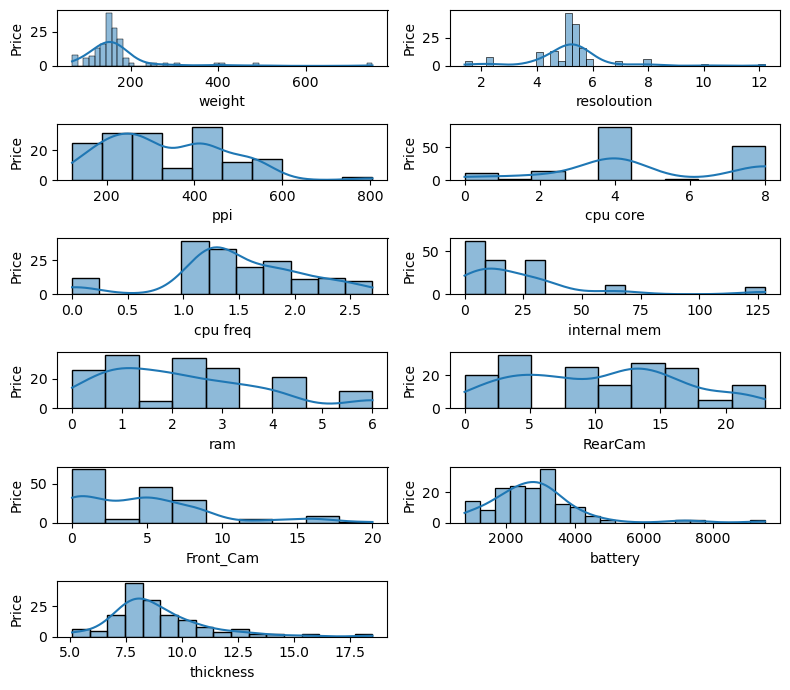

In [214]:
#Figure 2:La relation entre le prix et les differentes caracteristiques
cols = ['weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']
fig, axes = plt.subplots(figsize=(8, 7), nrows=6, ncols=2)
axes = axes.flatten()
for i in range(len(cols)):
    sns.histplot(df, x=cols[i], ax=axes[i], kde=True)
    axes[i].set_ylabel('Price')
    axes[i].set_xlabel(cols[i])
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

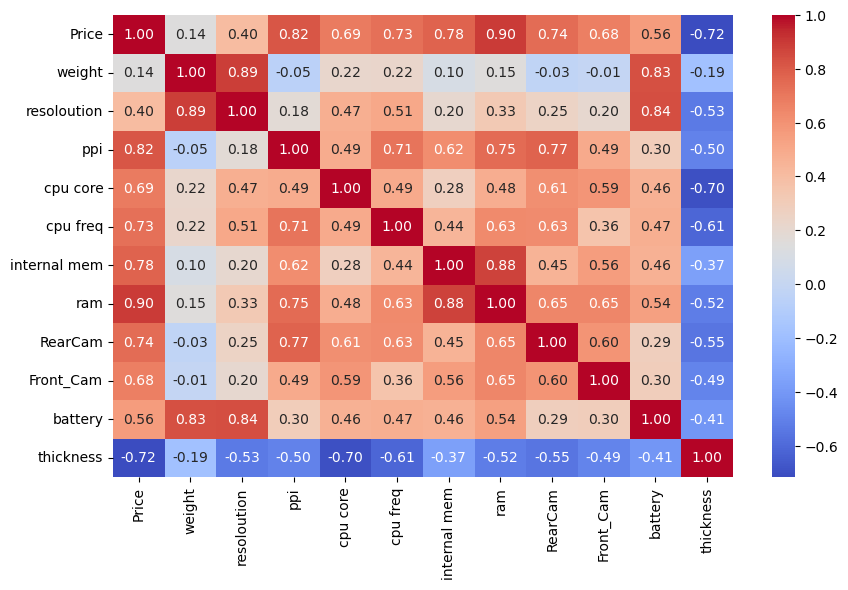

(161, 12)

In [187]:
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()
df.shape

In [44]:
x = df.drop('Price' , axis=1)
y = df['Price']

In [50]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=42 , test_size=0.3)

Regression lineaire

In [57]:
lr_model =sm.OLS(y_train, sm.add_constant(x_train)).fit()
results_table = lr_model.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1803.438269,277.788423,6.492129,3.298044e-09,1252.313950,2354.562587
weight,-0.449343,0.935313,-0.480420,6.319781e-01,-2.304976,1.406291
resoloution,-92.996629,57.613405,-1.614149,1.096463e-01,-207.299983,21.306726
ppi,1.187516,0.267854,4.433450,2.382059e-05,0.656102,1.718931
cpu core,49.701672,13.278175,3.743110,3.036597e-04,23.358151,76.045192
cpu freq,151.553071,61.447686,2.466376,1.534984e-02,29.642613,273.463529
internal mem,4.715090,1.393658,3.383247,1.023945e-03,1.950112,7.480069
ram,104.392735,34.558675,3.020739,3.201320e-03,35.829308,172.956161
RearCam,2.651623,5.635509,0.470521,6.390078e-01,-8.529067,13.832313
Front_Cam,3.774866,6.270302,0.602023,5.485213e-01,-8.665234,16.214966


In [59]:
lr_model.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.946
1,Dependent Variable:,Price,AIC:,1498.0631
2,Date:,2024-11-05 14:47,BIC:,1530.6851
3,No. Observations:,112,Log-Likelihood:,-737.03
4,Df Model:,11,F-statistic:,178.3
5,Df Residuals:,100,Prob (F-statistic):,1.69e-60
6,R-squared:,0.951,Scale:,34089.


In [170]:
#obtention des predictions et des metriques d'evaluation
y_train_pred_lr = lr_model.predict(sm.add_constant(x_train))
y_test_pred_lr = lr_model.predict(sm.add_constant(x_test))
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
rmse_test_lr = np.sqrt(mse_test_lr)

In [172]:
#construction du tableau du resultats
df_metrics = pd.DataFrame({
    'Metrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train_lr, mse_train_lr, rmse_train_lr],
    'Test': [r2_test_lr, mse_test_lr, rmse_test_lr]})
print(df_metrics)

  Metrique         Train          Test
0       R2      0.951486      0.952192
1      MSE  30436.588963  23541.299660
2     RMSE    174.460852    153.431743


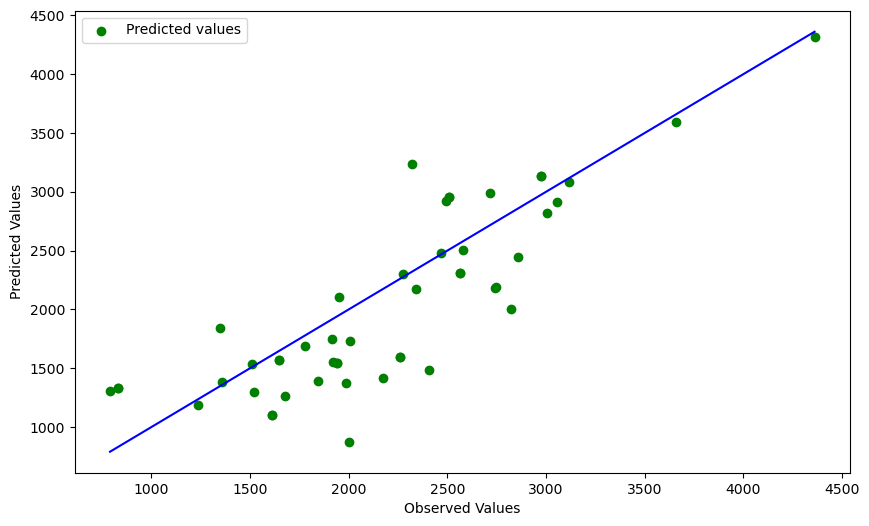

In [189]:
#Figure 3: Regression lineaire 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Predicted values')
min_val = min(min(y_test), min(y_test_pred))
max_val = max(max(y_test), max(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='blue')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.legend()  
plt.show()

Regression Ridge

In [84]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [127]:
alpha_values = np.logspace(-6, 6, 200)  
ridge_cv = RidgeCV(alphas=alpha_values, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(x_train_scaled, y_train)
best_alpha_ridge = ridge_cv.alpha_
y_pred_ridge = ridge_cv.predict(x_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Meilleur alpha pour Ridge dans l'intervalle : {best_alpha_ridge}")
print(f"MSE__ridge: {mse_ridge}")
print(f"RMSE__ridge: {rmse_ridge}")
print(f"R²__ridge: {r2_ridge}")

Meilleur alpha pour Ridge dans l'intervalle : 5.672426068491977
MSE__ridge: 23240.297029514484
RMSE__ridge: 152.44768620584074
R²__ridge: 0.9528037069645068


Regression Lasso

In [137]:
alpha_values = np.logspace(-6, 6, 200)
lasso_cv = LassoCV(alphas=alpha_values, cv=5)
lasso_cv.fit(x_train_scaled, y_train)
best_alpha_lasso = lasso_cv.alpha_
y_pred_lasso = lasso_cv.predict(x_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Meilleur alpha pour Lasso: {best_alpha_lasso}")
print(f"MSE_lasso: {mse_lasso}")
print(f"RMSE_lasso: {rmse_lasso}")
print(f"R²_lasso: {r2_lasso}")

Meilleur alpha pour Lasso: 1.231550603292826
MSE_lasso: 23298.510569891252
RMSE_lasso: 152.63849635623134
R²_lasso: 0.9526854871626357


Reseaux de neurones 

In [142]:
model = Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
model.build(x_train.shape) 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (112, 128)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (112, 32)              │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (112, 16)              │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (112, 1)               │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,209 (24.25 KB)

 Trainable params: 6,209 (24.25 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
model.compile(optimizer='RMSprop', loss='mse')

In [146]:
model.fit(x=x_train_scaled,y=y_train.values, validation_data=(x_test_scaled,y_test.values),
batch_size=128,epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 5570964.5000 - val_loss: 5318279.0000
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5569549.5000 - val_loss: 5317298.5000
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5568417.0000 - val_loss: 5316317.5000
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5567281.0000 - val_loss: 5315331.0000
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5566156.5000 - val_loss: 5314369.5000
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5565054.5000 - val_loss: 5313416.5000
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5563959.0000 - val_loss: 5312470.0000
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5562868.5000 - val_loss: 5311500.5000
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5561747.5000 - val_loss: 5310497.0000
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 5560587.5000 - val_loss: 5309455.5000
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 

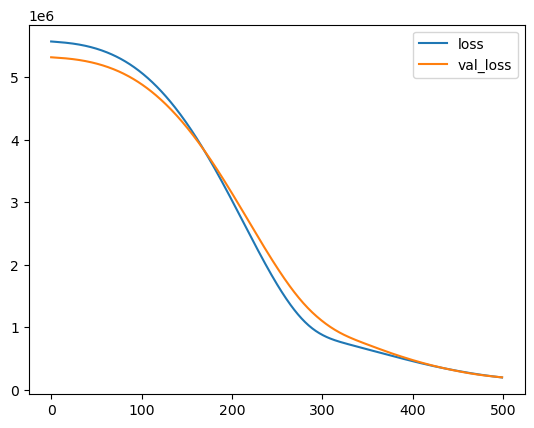

In [148]:
#Figure 4: Visualisation des pertes 
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [154]:
# Prédictions sur l'ensemble de test
y_pred_rn = model.predict(x_test_scaled)
mse_rn = mean_squared_error(y_test.values, y_pred_rn)
rmse_rn = np.sqrt(mse_rn)
r2_rn = r2_score(y_test.values, y_pred_rn)
print(f"MSE_rn: {mse}")
print(f"RMSE_rn: {rmse}")
print(f"R²_rn: {r2}")plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE_rn: 198607.67223954757
RMSE_rn: 445.65420702552285
R²_rn: 0.5966684123610491


Fonction pour créer un modèle avec régularisation et Dropout

In [164]:
def create_model(dropout_rate=0.0, l1_reg=0.0, l2_reg=0.0):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],),
                    kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1(l1_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1_reg, l2_reg)))
    model.add(Dense(1))  # Couche de sortie
    model.compile(optimizer='RMSprop', loss='mse')
    return model


results = []

# Paramètres à tester
dropout_rates = [0.0, 0.5]
l1_values = [0.0, 0.01]
l2_values = [0.0, 0.01]


for dropout in dropout_rates:
    for l1 in l1_values:
        for l2 in l2_values:
            print(f'Testing Dropout: {dropout}, L1: {l1}, L2: {l2}')
            model = create_model(dropout_rate=dropout, l1_reg=l1, l2_reg=l2)
            history = model.fit(x_train_scaled, y_train.values, 
                                validation_data=(x_test_scaled, y_test.values),
                                batch_size=128, epochs=500, verbose=0)
            
            # Évaluation du modèle
            y_pred = model.predict(x_test_scaled)
            mse = mean_squared_error(y_test.values, y_pred)
            r2 = r2_score(y_test.values, y_pred)
            results.append((dropout, l1, l2, mse, r2))


results_df = pd.DataFrame(results, columns=['Dropout Rate', 'L1', 'L2', 'MSE', 'R^2'])


print(results_df)

Testing Dropout: 0.0, L1: 0.0, L2: 0.0


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Testing Dropout: 0.0, L1: 0.0, L2: 0.01


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Testing Dropout: 0.0, L1: 0.01, L2: 0.0


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Testing Dropout: 0.0, L1: 0.01, L2: 0.01


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Testing Dropout: 0.5, L1: 0.0, L2: 0.0


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Testing Dropout: 0.5, L1: 0.0, L2: 0.01


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Testing Dropout: 0.5, L1: 0.01, L2: 0.0


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Testing Dropout: 0.5, L1: 0.01, L2: 0.01


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
   Dropout Rate    L1    L2            MSE       R^2
0           0.0  0.00  0.00  395567.663933  0.196683
1           0.0  0.00  0.01  176643.823869  0.641272
2           0.0  0.01  0.00  135020.593681  0.725801
3           0.0  0.01  0.01  144555.079803  0.706438
4           0.5  0.00  0.00  211985.027932  0.569502
5           0.5  0.00  0.01  231658.853184  0.529548
6           0.5  0.01  0.00  325234.084787  0.339516
7           0.5  0.01  0.01  305700.553252  0.379185


Comparaison des resultats

In [174]:
results = pd.DataFrame({
    'Model': ['Regression lineaire', 'Regression ridge', 'Regression Lasso', 'Reseaux de neurones'],
    'MSE': [mse_test_lr, mse_ridge, mse_lasso, mse_rn],
    'RMSE': [rmse_test_lr, rmse_ridge, rmse_lasso, rmse_rn],
    'R²': [r2_test_lr, r2_ridge, r2_lasso, r2_rn]
})

print(results)

                 Model           MSE        RMSE        R²
0  Regression lineaire   23541.29966  153.431743  0.952192
1     Regression ridge   23240.29703  152.447686  0.952804
2     Regression Lasso   23298.51057  152.638496  0.952685
3  Reseaux de neurones  198607.67224  445.654207  0.596668
